<a href="https://colab.research.google.com/github/i-ninte/machine_learning/blob/main/LOAN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION

This project helps apply for loans and eceive notifications upon approval. With the data provided by the applicant the system tells the user about the availability of the loan

In [ ]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [ ]:
df= pd.read_csv("LOAN.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

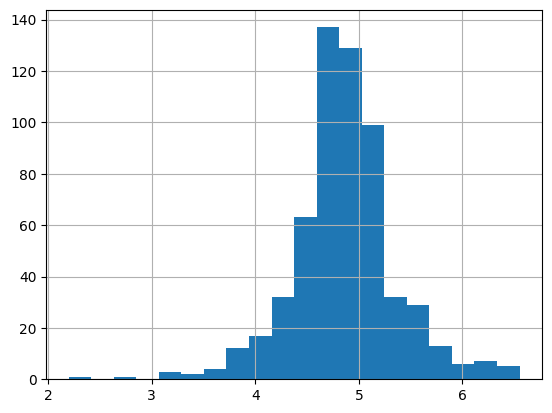

In [ ]:
df['LoanAmount_log']= np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

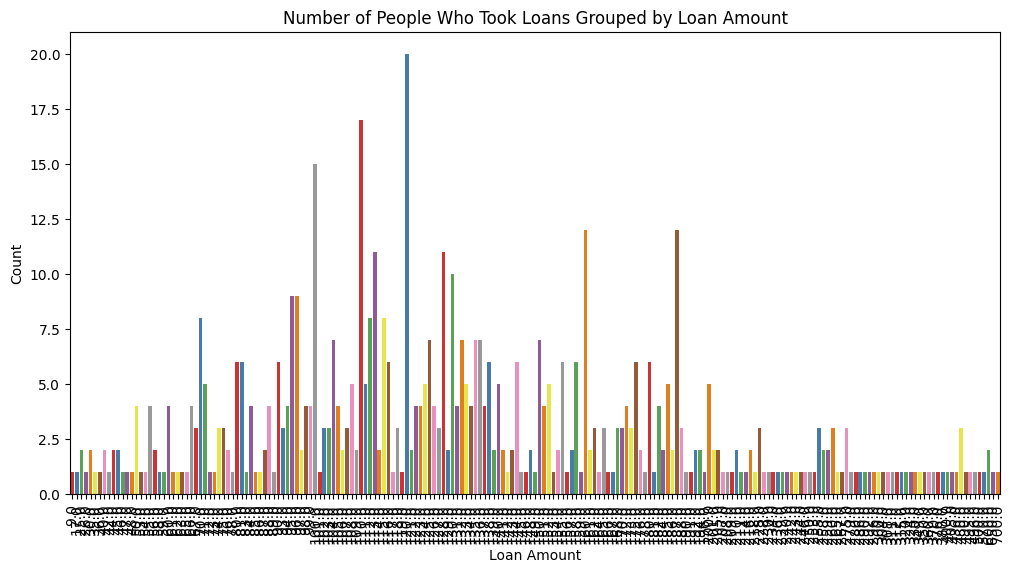

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'LoanAmount' and count the number of occurrences
loan_amount_counts = df['LoanAmount'].value_counts().reset_index()
loan_amount_counts.columns = ['LoanAmount', 'Count']

# Sort the data by 'LoanAmount' for a more meaningful plot
loan_amount_counts = loan_amount_counts.sort_values(by='LoanAmount')

# Create a countplot
plt.figure(figsize=(12, 6))  # Adjust the figure size for better visibility
sns.barplot(x='LoanAmount', y='Count', data=loan_amount_counts, palette='Set1')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.title("Number of People Who Took Loans Grouped by Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Count")

plt.show()


<Axes: >

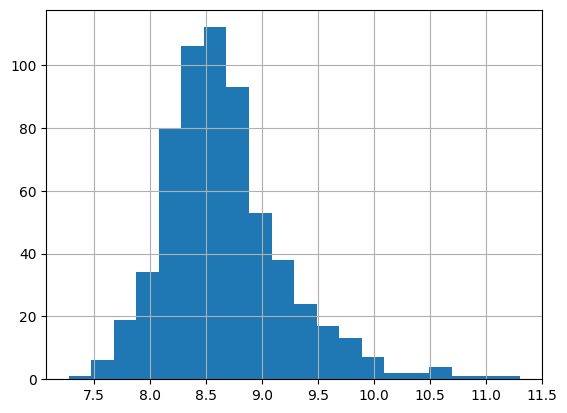

In [ ]:
df['TotalIncome']= df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log']= np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [ ]:
df['LoanAmount_log']= np.log(df['LoanAmount'])

In [ ]:
#filling null values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
#filling loan amount with the mean
df.LoanAmount= df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log= df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)



In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
TotalIncome_log      0
LoanAmount_log       0
dtype: int64

In [ ]:
#selecting some columns for training
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values
x

array([['Male', 'No', '0', ..., 1.0, 5849.0, 8.674025985443025],
       ['Male', 'Yes', '1', ..., 1.0, 6091.0, 8.714567550836485],
       ['Male', 'Yes', '0', ..., 1.0, 3000.0, 8.006367567650246],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 8312.0, 9.025455532779063],
       ['Male', 'Yes', '2', ..., 1.0, 7583.0, 8.933664178700935],
       ['Female', 'No', '0', ..., 0.0, 4583.0, 8.430109084509125]],
      dtype=object)

In [ ]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [ ]:
print("percentage of missing gender is %2f%%" %((df['Gender'].isnull().sum()/df.shape[0] * 100)))

percentage of missing gender is 0.000000%


In [ ]:
df.shape[0]

614

number of people who take loan as group by gender: 
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

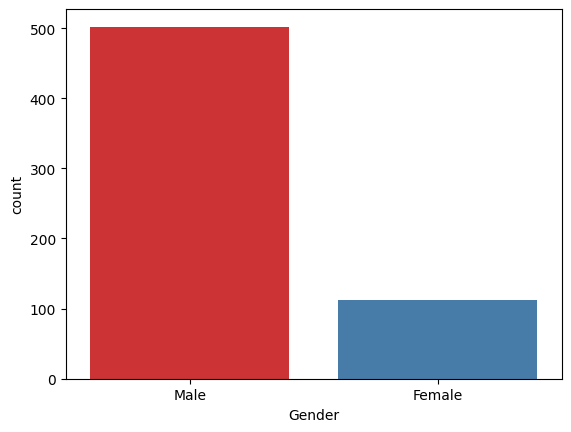

In [ ]:
print("number of people who take loan as group by gender: ")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette='Set1')

number of people who take loan as group by marital status: 
Yes    401
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

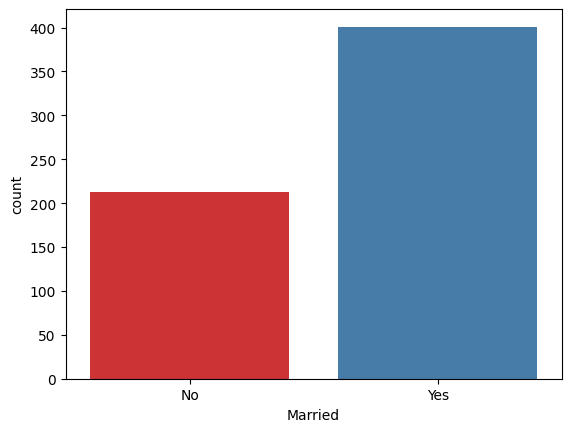

In [ ]:
print("number of people who take loan as group by marital status: ")
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, palette='Set1')

number of people who take loan as group by self employed: 
No     532
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

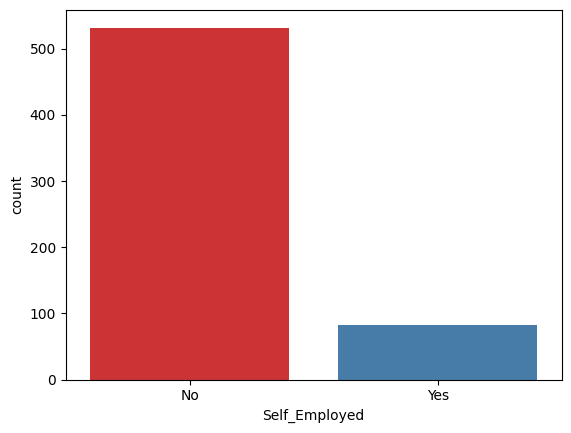

In [ ]:
print("number of people who take loan as group by self employed: ")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=df, palette='Set1')

number of people who take loan as group by dependents: 
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

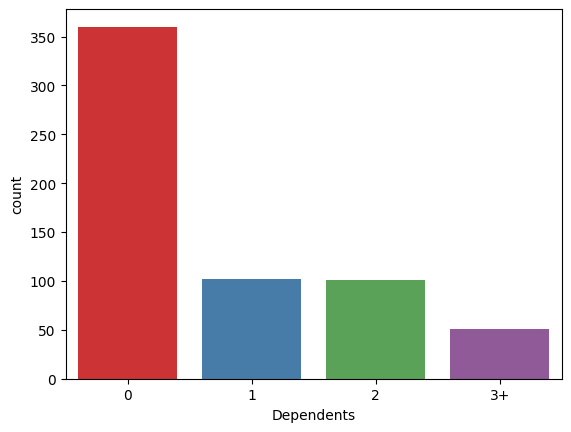

In [ ]:
print("number of people who take loan as group by dependents: ")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df, palette='Set1')

number of people who take loan as group by loan amount: 
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

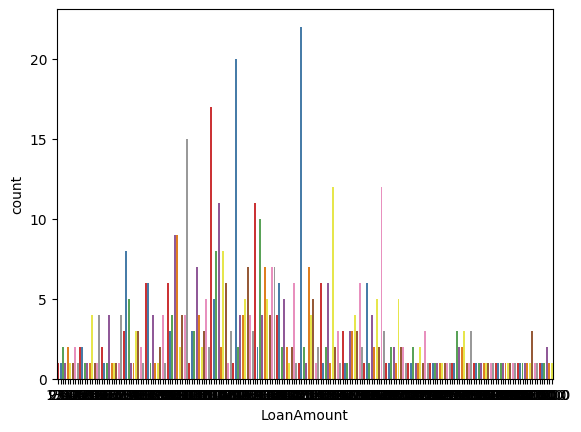

In [ ]:
print("number of people who take loan as group by loan amount: ")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount', data=df, palette='Set1')

In [ ]:


# Define loan amount ranges
bins = [0, 100, 200, 300, 400, 500, 600, 700, float("inf")]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '700+']

# Create a new column in your DataFrame to represent the loan amount ranges
df['LoanAmountRange'] = pd.cut(df['LoanAmount'], bins=bins, labels=labels, include_lowest=True)

# Group the data by 'LoanAmountRange' and calculate the mean loan amount in each range
loan_amount_summary = df.groupby('LoanAmountRange')['LoanAmount'].mean().reset_index()

# Rename columns for clarity
loan_amount_summary.columns = ['Loan Amount Range', 'Average Loan Amount']

# Display the table
print(loan_amount_summary)


  Loan Amount Range  Average Loan Amount
0             0-100            75.909091
1           101-200           140.173862
2           201-300           244.117647
3           301-400           340.600000
4           401-500           473.555556
5           501-600           590.000000
6           601-700           675.000000
7              700+                  NaN


number of people who take loan as group by loan amount: 
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

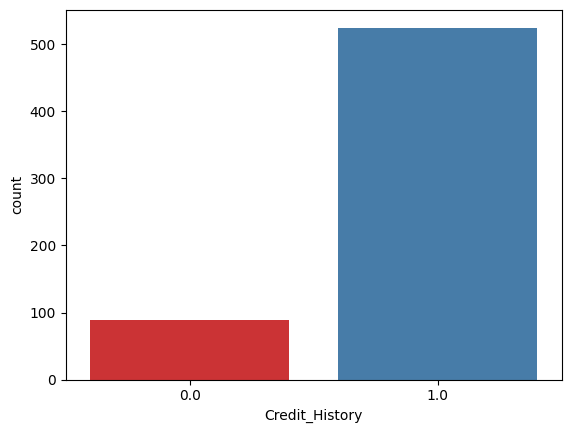

In [ ]:
print("number of people who take loan as group by loan amount: ")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=df, palette='Set1')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=0)

from sklearn.preprocessing import LabelEncoder
LabelEncoder_x= LabelEncoder()

In [ ]:
for i in range(0,5):
    X_train[:, i]= LabelEncoder_x.fit_transform(X_train[:,i])
    X_train[:,7]=LabelEncoder_x.fit_transform(X_train[:,7])
X_train

array([[1, 1, 0, ..., 1.0, 5858.0, 267],
       [1, 0, 1, ..., 1.0, 11250.0, 407],
       [1, 1, 0, ..., 0.0, 5681.0, 249],
       ...,
       [1, 1, 3, ..., 1.0, 8334.0, 363],
       [1, 1, 0, ..., 1.0, 6033.0, 273],
       [0, 1, 0, ..., 1.0, 6486.0, 301]], dtype=object)

In [ ]:
LabelEncoder_y= LabelEncoder()
y_train= LabelEncoder_y.fit_transform(y_train)


y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
for i in range(0,5):
    X_test[:,i]= LabelEncoder_x.fit_transform(X_test[:,i])
    X_test[:,7]= LabelEncoder_x.fit_transform(X_test[:,7])

X_test

array([[1, 0, 0, 0, 5, 1.0, 7085.0, 85],
       [0, 0, 0, 0, 5, 1.0, 4230.0, 28],
       [1, 1, 0, 0, 5, 1.0, 10039.0, 104],
       [1, 1, 0, 0, 5, 1.0, 6784.0, 80],
       [1, 1, 2, 0, 5, 1.0, 3875.0, 22],
       [1, 1, 0, 1, 3, 0.0, 6058.0, 70],
       [1, 1, 3, 0, 3, 1.0, 6417.0, 77],
       [1, 0, 0, 0, 5, 1.0, 12876.0, 114],
       [1, 0, 0, 0, 5, 0.0, 5124.0, 53],
       [1, 1, 0, 0, 5, 1.0, 5233.0, 55],
       [0, 0, 0, 0, 5, 1.0, 2917.0, 4],
       [1, 1, 1, 0, 5, 1.0, 2895.0, 2],
       [0, 0, 0, 0, 5, 1.0, 8333.0, 96],
       [1, 1, 2, 0, 5, 1.0, 8667.0, 97],
       [1, 1, 0, 0, 5, 1.0, 14880.0, 117],
       [1, 1, 1, 0, 5, 1.0, 3875.0, 22],
       [1, 0, 1, 1, 5, 1.0, 4311.0, 32],
       [1, 0, 0, 1, 5, 1.0, 3946.0, 25],
       [0, 0, 0, 0, 5, 1.0, 2500.0, 1],
       [1, 1, 0, 1, 5, 0.0, 4787.0, 44],
       [0, 1, 0, 0, 5, 0.0, 6085.0, 71],
       [1, 1, 0, 0, 5, 1.0, 4765.0, 43],
       [1, 1, 2, 0, 5, 1.0, 7550.0, 91],
       [1, 1, 2, 0, 5, 1.0, 11500.0, 111],
       [1, 

In [ ]:
LabelEncoder_y= LabelEncoder()
y_test= LabelEncoder_y.fit_transform(y_test)


y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf= RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#checking which columns are best fit for prediction
from sklearn import metrics
y_pred= rf_clf.predict(X_test)
print("accuracy of random forest classifier is: ", metrics.accuracy_score(y_pred, y_test))

y_pred

accuracy of random forest classifier is:  0.7479674796747967


array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [37]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred= nb_clf.predict(X_test)
print("accuracy of gaussianNB is: ", metrics.accuracy_score(y_pred, y_test))

accuracy of gaussianNB is:  0.8373983739837398


In [39]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred= dt_clf.predict(X_test)
print("accuracy of decision tree classifier is: ", metrics.accuracy_score(y_pred, y_test))

accuracy of decision tree classifier is:  0.7235772357723578


In [42]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [43]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf= KNeighborsClassifier()
kn_clf.fit(X_train, y_train)


KNeighborsClassifier()

In [44]:
y_pred= kn_clf.predict(X_test)
print("accuracy is: ", metrics.accuracy_score(y_pred, y_test))

accuracy is:  0.7723577235772358


BEST MODEL IS GaussianNB